CREATING A SIMPLIFIED ATTENTION MECHANISM

In [2]:
import torch
inputs = torch.tensor(
    [[0.43, 0.15, 0.89], #Your
     [0.55, 0.87, 0.66], #Journey
     [0.57, 0.85, 0.64], #Starts
     [0.22, 0.58, 0.33], #With
     [0.77, 0.25, 0.10], #One
     [0.05, 0.80, 0.55]] #Step
)

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


PLOT THE SIMILARITY BETWEEN WORDS USING WORD EMBEDINGS

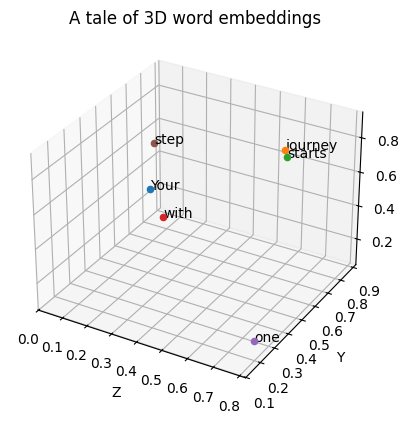

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

words = ['Your', 'journey', 'starts', 'with', 'one', 'step']
x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for x, y,z, word in zip(x_coords, y_coords, z_coords, words):
    ax.scatter(x,y,z)
    ax.text(x,y,z, word, fontsize=10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlabel('Z')

plt.title("A tale of 3D word embeddings")
plt.show()

CODE A SIMPLE DOT PRODUCT BASED ATTENTION SCORE

In [7]:

query = inputs[1]
print("Inputs Shape :", inputs.shape)
attn_scores_2 = torch.empty(inputs.shape[0])
print("Init Attention Scores: ", attn_scores_2)
for i, x_i in enumerate(inputs):
    print("The I : ", i , "The XI : ", x_i)
    attn_scores_2[i] = torch.dot(x_i , query)

print("Attention Scores : ", attn_scores_2)



Inputs Shape : torch.Size([6, 3])
Init Attention Scores:  tensor([0.0000e+00, 0.0000e+00, 7.7052e+31, 1.9447e+31, 2.1715e-18, 2.3081e-12])
The I :  0 The XI :  tensor([0.4300, 0.1500, 0.8900])
The I :  1 The XI :  tensor([0.5500, 0.8700, 0.6600])
The I :  2 The XI :  tensor([0.5700, 0.8500, 0.6400])
The I :  3 The XI :  tensor([0.2200, 0.5800, 0.3300])
The I :  4 The XI :  tensor([0.7700, 0.2500, 0.1000])
The I :  5 The XI :  tensor([0.0500, 0.8000, 0.5500])
Attention Scores :  tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


NORMALIZE ATTENTION SCORE TO REPRESENT IT AS A PERCENTAGE OF WEIGHTS THAT SUM UP TO ONE

In [9]:
total_sum_scores = attn_scores_2.sum()
print("total sum : " , total_sum_scores)
normalized_attention_scores = attn_scores_2 / total_sum_scores;
print("Normalized attention scores : ", normalized_attention_scores)
print("Sum of normalized attention scores : ", normalized_attention_scores.sum())

total sum :  tensor(6.5617)
Normalized attention scores :  tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum of normalized attention scores :  tensor(1.0000)


USING SOFTMAX NORMALIZATION FOR A DIFFERENTIABLE GRADIENT

In [11]:
def softmax_naive(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

attn_scores_2_naive = softmax_naive(attn_scores_2)
print("Softmax normalized attention weights : ", attn_scores_2_naive)
print("Sum: ", attn_scores_2_naive.sum())

Softmax normalized attention weights :  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum:  tensor(1.)


USING PYTORCH'S IMPLEMENTATION OF SOFTMAX : exp(xi​)/∑j​exp(xj​) ( SAFE FOR VERY LARGE OR SMALL VALUES)